In [1]:
#SOM 算法的一个学习
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0.8, 0.6], [0.1736, -0.9848], [0.707, 0.707], [0.342, -0.9397], [0.6, 0.8]])

In [2]:
print(X)
print(X.shape)

[[ 0.8     0.6   ]
 [ 0.1736 -0.9848]
 [ 0.707   0.707 ]
 [ 0.342  -0.9397]
 [ 0.6     0.8   ]]
(5, 2)


In [3]:
X_radian = np.arctan2(X[:,1],X[:,0])
print(X_radian)

[ 0.64350111 -1.3963095   0.78539816 -1.22175193  0.92729522]


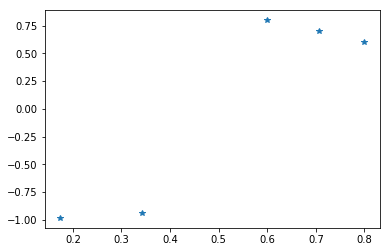

In [4]:
plt.plot(X[:,0],X[:,1],"*")
plt.show()

这里需要说明的是，上面是数据在直角坐标下面的表示，可以看到，上面的三个点是一类，然后下面的两个点是一类
下面我会画出极坐标下的表示，可以先从极坐标上学一遍，然后再在直角坐标下面做一遍

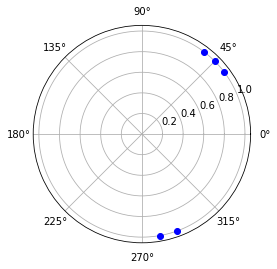

In [5]:
r = np.ones(X.shape[0])
ax = plt.subplot(111,projection='polar')
ax.plot(X_radian,r,'bo')

In [6]:
iters_num = 20
learning_rate =  0.5
W = np.array([0,-np.pi])
#超参数的设置

接下来是极坐标下面的SOM算法实现
### SOM算法原理
自组织映射（SOM）网络，也被称为 Kohonen 网络或者胜者独占单元（WTU），在大脑中，不同的感官输入以拓扑顺序的方式呈现，是受人脑特征启发而提出的一种非常特殊的神经网络。
与其他神经网络不同，SOM 神经元之间并不是通过权重相互连接的，相反，它们能够影响彼此的学习。SOM 最重要的特点是神经元以拓扑方式表示所学到的输入信息。
SOM 通过竞争机制进行学习，可以认为它是 PCA 的非线性推广，因此 SOM 可以像 PCA 一样用于降维。


先来了解它是如何工作的，用随机值或从输入中随机采样对连接权重进行初始化，网格中的每个神经元都被赋予一个位置。数据输入后，测量输入向量（X）和所有神经元权向量（W）之间的距离，与输入数据距离最小的神经元为胜者（WTU），距离度量如下：
![image.png](./2019_3_4_1.gif)
其中，dj 是神经元 j 的权重与输入 X 之间的距离，最小距离的神经元是胜者。

第二步，调整获胜神经元及其邻域神经元的权重，以确保如果下一次是相同的输入，则胜者还是同一个神经元。网络采用邻域函数 Λ(r) 确定哪些邻域神经元权重需要修改，通常使用高斯墨西哥帽函数作为邻域函数，数学表达式如下：
![image.png](./2019_3_4_2.gif)
 
其中，σ 是随时间变化的神经元影响半径，d 是距离获胜神经元的距离：
![image.png](./2019_3_4_3.jpg)
邻域函数的一个重要特性是它的半径随时间而减小，这样刚开始时较多邻域神经元权重被修改，但是随着网络的学习，最终只有少量的神经元的权重被修改（有时只有一个或没有）。权重的改变由下式计算：
![image.png](./2019_3_4_4.gif)
按照这个方法继续处理输入，重复执行给定的迭代次数。在迭代过程中利用一个与迭代次数相关的因子来减少学习率和影响半径。

In [7]:
for i in range(iters_num):
    for x in X_radian:
        d = np.abs(x - W) #反映了这个的loss function
        print(x - W[1])
        if d[0] < d[1]:
            W[0] += learning_rate * (x-W[0])
        else:
            W[1] += learning_rate * (x-W[1])
        print("iters{%d}"% i)
        print("W[0] = ",W[0]*180/np.pi)
        print("W[1] = ",W[1]*180/np.pi)

3.7850937623830774
iters{0}
W[0] =  18.43494882292201
W[1] =  -180.0
1.7452831518132306
iters{0}
W[0] =  -30.783846261444875
W[1] =  -180.0
3.9269908169872414
iters{0}
W[0] =  7.108076869277562
W[1] =  -180.0
1.919840724820376
iters{0}
W[0] =  -31.446576130589015
W[1] =  -180.0
4.068887871591405
iters{0}
W[0] =  10.841763111783488
W[1] =  -180.0
3.7850937623830774
iters{1}
W[0] =  23.855830378813756
W[1] =  -180.0
1.7452831518132306
iters{1}
W[0] =  23.855830378813756
W[1] =  -130.00132067290585
3.054349241080626
iters{1}
W[0] =  34.427915189406875
W[1] =  -130.00132067290585
1.0471991489137604
iters{1}
W[0] =  34.427915189406875
W[1] =  -100.00127490168073
2.6726467212279097
iters{1}
W[0] =  43.77900877178143
W[1] =  -100.00127490168073
2.3888526120195817
iters{2}
W[0] =  40.32445320881273
W[1] =  -100.00127490168073
0.34904200144973485
iters{2}
W[0] =  40.32445320881273
W[1] =  -90.00195812374623
2.356228665898878
iters{2}
W[0] =  42.662226604406364
W[1] =  -90.00195812374623
0.34907

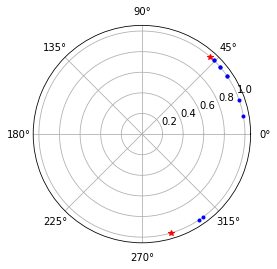

In [8]:
W_r = np.ones(W.shape[0])
bx = plt.subplot(111,projection='polar')
bx.plot(W,W_r,'r*')
bx.plot(X,r,'b.')

# 接下来我们可以用tensorflow实现一个SOM算法
## 简介
Kohonen自组织特征映射或SOMs，是由芬兰科学院教授Teuvo Kohonen发明的，他们提供了一种在低维空间（通常是一维或二维）表示多维数据的方法。这个降低矢量维度的过程本质上是一种称为矢量量化的数据压缩技术。此外，Kohonen技术创建了一个网络，以这种方式存储信息，以保持训练集内的任何拓扑关系。

SOM一个常见示例是将颜色从其三维空间（红色，绿色和蓝色）映射到两个维度。图1显示了一个SOM训练的例子，用于识别右侧显示的八种不同颜色。颜色作为向量呈现给网络 - 每个颜色分量都有一个维度 - 网络已经学会在二维空间中表示它们。注意，除了将颜色聚类到不同的区域之外，通常还会发现类似属性的区域彼此相邻。
![image](./2019_3_4_5.png)
## 网络结构
SOM(Self Organizing Feature Maps)的网络结构非常简单, 很适合作为一个入门案例. 如图2所示, 本教程讨论的是一个二维SOM. 这个网络可以被当作一个两层网络: 输入层和输出层. 输入层只有一个节点, 我们用X表示输入, 输出层是一个7x7的矩阵或者说表格. 因为我们要对颜色进行分类, 所以我们设输入向量x是一个三维向量, 如[0 0 1], 代表一种颜色. 输出层的每个神经元有一个权重向量W, 我们这个网络中就有49个权重向量, 而且向量的维数与输入向量相等, 也是3, 这样这些权重向量也可以被当作一种颜色的数值表示, 所以可以被可视化成图1的样子.
![image](./2019_3_4_6.png)

## 学习过程
SOM是无监督学习, 不需要成对的数据. SOM的学习过程可以总结成一句话, 就是调整输出层权重W以便于让相邻的节点具有相似的权重. 具体来说分为一下的步骤:

* 每个节点的权重都被随机初始化。
* 从训练数据集中随机选择向量x并将其输入到网格。
* 检查每个输出层节点以计算哪一个的权重最像输入向量。获胜节点通常被称为最佳匹配单元（BMU）或激活单元。
* 现在计算BMU邻域节点, 以BMU为圆心, 处于半径R内的节点都被称为邻域。R是一个开始较大的值，通常设置为输出层的“半径”，但会随着训练逐步减小。在该* 半径内发现的任何节点都被视为在BMU的邻域内。
* 调整每个邻域节点（步骤4中找到的节点）权重以使它们更像输入向量。节点越靠近BMU，其权重调整的就越大。
* N次迭代重复步骤2。

In [9]:
import tensorflow as tf
import numpy as np
sess = tf.InteractiveSession()